In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_excel('data/data.xlsx')
empty_data = dataset.dropna(how='all')
empty_data = empty_data.dropna(axis=1,how='all')
empty_data = empty_data.reset_index()
empty_data = empty_data.drop(columns=['L,p','index'])
dataset = empty_data


In [3]:
#Set equal label type for sick people
for i, row in dataset.iterrows():
    label = row['label']
    if label == ' s':
        dataset.at[i,'label'] = 's'
    elif label == 'S':
        dataset.at[i,'label'] = 's'

In [4]:
sick = dataset[(dataset['label']=='s')]
obese = dataset[(dataset['label']=='o')]
healthy = dataset[(dataset['label']=='k')]

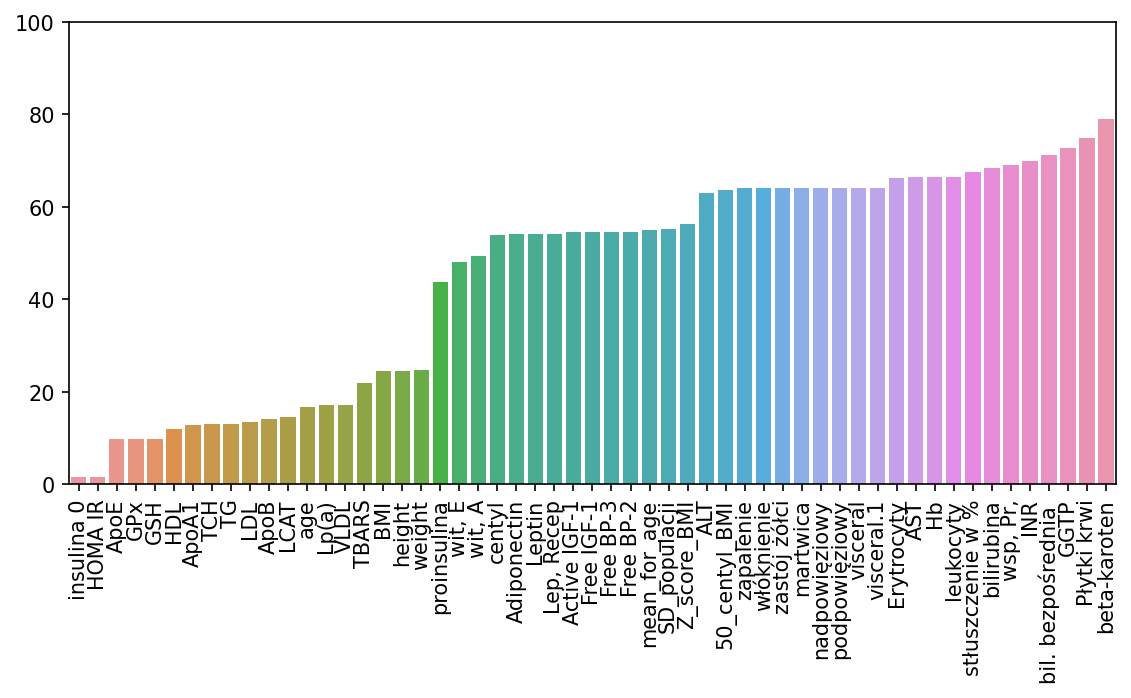

In [5]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

def draw_missing(dataset):
    ifg = plt.figure(figsize=(9,4),dpi=150)
    percent_nan = percent_missing(dataset)
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90)
    plt.ylim(0,100)

draw_missing(dataset)

In [6]:
dataset.describe()

,age,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,50_centyl_BMI,wątroba powiększona,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,229.000000,207.000000,208.000000,208.000000,127.000000,124.000000,123.000000,120.000000,100.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.482455,66.596353,1.606257,25.198620,74.196850,19.299194,2.701382,0.855838,18.686000,0.040000,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.391279,22.361129,0.202655,5.494137,33.330962,1.769823,0.465180,3.836220,1.721112,0.196316,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,3.000000,15.540000,1.280000,-10.881119,15.400000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.789041,54.250000,1.540000,21.122453,50.000000,17.900000,2.520000,-0.433835,17.450000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,67.000000,1.657500,25.126759,97.000000,19.630000,2.710000,1.743748,19.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,81.000000,1.740000,28.648469,97.000000,20.790000,2.930000,2.603780,20.100000,0.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,97.000000,21.650000,3.300000,16.722513,21.500000,1.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


In [7]:
#For rows where there is no age or weight, put random age generated from normal distribution with mean age and standard deviation of age
np.random.seed(300464)
for set in [sick, obese, healthy]:
    mean_age = set[['age']].mean()
    std_age = set[['age']].std()
    for i, row in set.iterrows():
        (weight, age) = row[['weight','age']]
        if  pd.isnull(age):
            new_age = np.random.normal(mean_age,std_age)
            set.at[i,'age'] = new_age
        if (age < 5) and (weight > 40):
            new_age = np.random.normal(mean_age,std_age)
            set.at[i,'age'] = new_age
  

In [8]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,50_centyl_BMI,wątroba powiększona,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,207.000000,208.000000,208.000000,127.000000,124.000000,123.000000,120.000000,100.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.596353,1.606257,25.198620,74.196850,19.299194,2.701382,0.855838,18.686000,0.040000,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,22.361129,0.202655,5.494137,33.330962,1.769823,0.465180,3.836220,1.721112,0.196316,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,3.000000,15.540000,1.280000,-10.881119,15.400000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,54.250000,1.540000,21.122453,50.000000,17.900000,2.520000,-0.433835,17.450000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,67.000000,1.657500,25.126759,97.000000,19.630000,2.710000,1.743748,19.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,81.000000,1.740000,28.648469,97.000000,20.790000,2.930000,2.603780,20.100000,0.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,97.000000,21.650000,3.300000,16.722513,21.500000,1.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [10]:
#####test

set = sick.copy()


set_to_predict = set[set['weight'].isnull()][['age', 'weight']].drop('weight', axis = 1)
set_train = set[set['weight'].notnull()][['age', 'weight']]

assert set.shape[0] == set_to_predict.shape[0] + set_train.shape[0]

X = set_train.drop('weight', axis = 1)
y = set_train['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=515)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_real = scaler.transform(set_to_predict)

alphas = np.arange(0.001,10,0.01)
ridge_cv_model = RidgeCV(alphas=alphas,scoring='neg_root_mean_squared_error',cv=4,fit_intercept=True)
ridge_cv_model.fit(X_train,y_train)


train_predictions = ridge_cv_model.predict(X_train)

var = mean_squared_error(y_train,train_predictions)



for i, row in set.iterrows():
        (weight, age) = row[['weight','age']]
        if  pd.isnull(weight):
            prediction = ridge_cv_model.predict(scaler.transform(np.reshape(a = np.array(age),newshape = (1,-1))))
            E = prediction


            set.at[i,'weight'] = np.random.normal(E,var)

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

# Weight

In [11]:
def predict_weight(set, loop=0, plots = False):
    set_to_predict = set[set['weight'].isnull()][['age', 'weight']].drop('weight', axis = 1)
    set_train = set[set['weight'].notnull()][['age', 'weight']]

    assert set.shape[0] == set_to_predict.shape[0] + set_train.shape[0]

    X = set_train.drop('weight', axis = 1)
    y = set_train['weight']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=515)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_real = scaler.transform(set_to_predict)

    alphas = np.arange(0.001,10,0.01)
    ridge_cv_model = RidgeCV(alphas=alphas,scoring='neg_root_mean_squared_error',cv=4)
    ridge_cv_model.fit(X_train,y_train)

    test_predictions = ridge_cv_model.predict(X_test)

    MAE = mean_absolute_error(y_test,test_predictions)
    MSE = mean_squared_error(y_test,test_predictions)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE}\nRMSE: {RMSE}')

    real_predictions = ridge_cv_model.predict(X_real)

    set_to_predict = np.squeeze(set_to_predict)

    if plots:
        sns.scatterplot(x=set_to_predict, y=real_predictions)
        sns.scatterplot(data=set_train, x='age', y='weight')
        if loop == 0:
            plt.title('Sick')
        elif loop == 1:
            plt.title('Obese')
        elif loop == 2:
            plt.title('Healthy')
        plt.show()

    for i, row in set.iterrows():
        (weight, age) = row[['weight','age']]
        if  pd.isnull(weight):
            new_weight = ridge_cv_model.predict(scaler.transform(np.reshape(a = np.array(age),newshape = (1,-1))))

            set.at[i,'weight'] = new_weight


MAE: 13.028519233008442
RMSE: 16.233277347136415


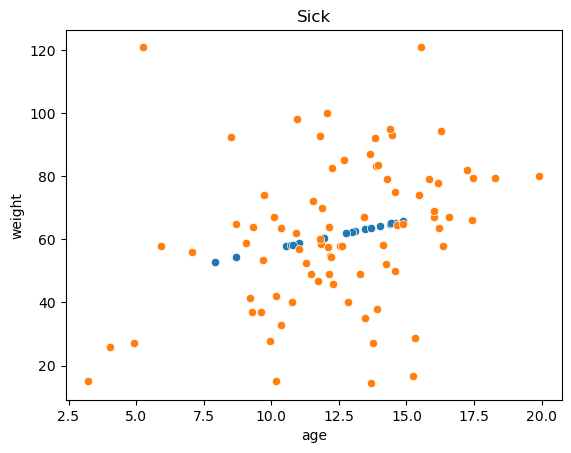

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

MAE: 12.783036054044567
RMSE: 16.953857988712933


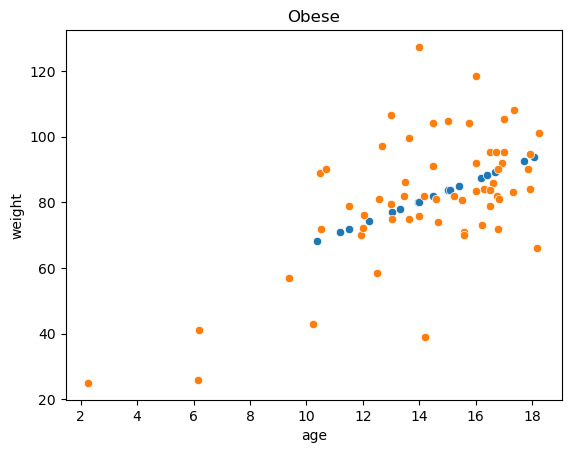

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

MAE: 10.775008590477004
RMSE: 11.62326946981515


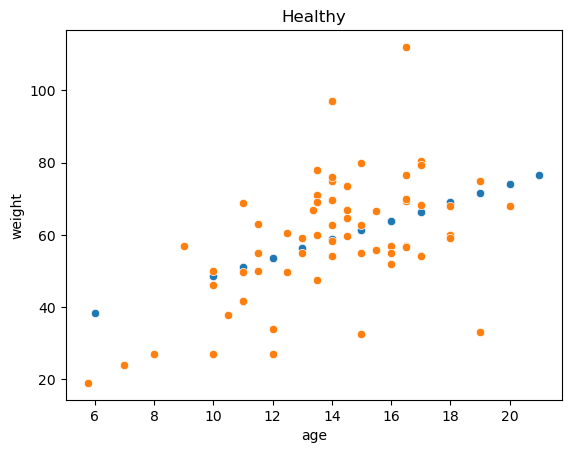

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

In [12]:
loop = 0 
for set in [sick, obese, healthy]:
    predict_weight(set, loop, True)
    loop +=1

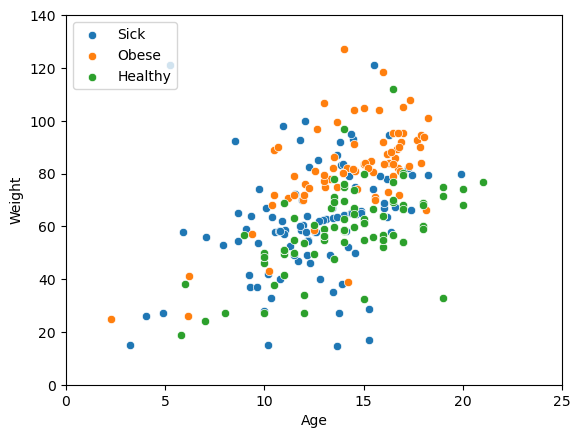

In [13]:

sns.scatterplot(data=sick, x = 'age', y='weight', label= 'Sick')
sns.scatterplot(data=obese, x = 'age', y='weight', label = 'Obese' )
sns.scatterplot(data=healthy, x = 'age', y='weight', label = 'Healthy')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.ylim((0,140))
plt.xlim((0,25))
plt.legend(loc=2)

In [14]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,50_centyl_BMI,wątroba powiększona,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,275.000000,208.000000,208.000000,127.000000,124.000000,123.000000,120.000000,100.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.448200,1.606257,25.198620,74.196850,19.299194,2.701382,0.855838,18.686000,0.040000,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,20.236100,0.202655,5.494137,33.330962,1.769823,0.465180,3.836220,1.721112,0.196316,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,3.000000,15.540000,1.280000,-10.881119,15.400000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,55.450000,1.540000,21.122453,50.000000,17.900000,2.520000,-0.433835,17.450000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,65.103509,1.657500,25.126759,97.000000,19.630000,2.710000,1.743748,19.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,80.000000,1.740000,28.648469,97.000000,20.790000,2.930000,2.603780,20.100000,0.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,97.000000,21.650000,3.300000,16.722513,21.500000,1.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


# Height

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV

In [16]:
def predict_height(set, loop, plots = False):
    
    set_to_predict = set[set['height'].isnull()][['age', 'weight', 'height']].drop('height', axis = 1)
    set_train = set[set['height'].notnull()][['age', 'weight', 'height']]

    assert set.shape[0] == set_to_predict.shape[0] + set_train.shape[0]
    
    X = set_train.drop(columns= 'height', axis = 1)
    y = set_train['height']
    polyniomial_transformer = PolynomialFeatures(degree=2, include_bias=False)
    polyniomial_transformer = polyniomial_transformer.fit(X)
    polynomial_features = polyniomial_transformer.transform(X)
    set_to_predict_poly = polyniomial_transformer.transform(set_to_predict)

    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.1, random_state=515)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_real = scaler.transform(set_to_predict_poly)

    elasticnet = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
    elasticnet.fit(X_train, y_train)   

    
    test_predictions = elasticnet.predict(X_test)

    MAE = mean_absolute_error(y_test,test_predictions)
    MSE = mean_squared_error(y_test,test_predictions)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE}\nRMSE: {RMSE}')

    real_predictions = elasticnet.predict(X_real)

    set_to_predict = np.squeeze(set_to_predict[['age']])

    if plots:
        sns.scatterplot(x=set_to_predict, y=real_predictions)
        sns.scatterplot(data=set_train, x='age', y='height')
        if loop == 0:
            plt.title('Sick')
        elif loop == 1:
            plt.title('Obese')
        elif loop == 2:
            plt.title('Healthy')
        plt.show()

    for i, row in set.iterrows():
        if not(pd.notnull(row['height'])):
            row_data = np.expand_dims((row[['age', 'weight']].values), axis = 0 )
            
            row_data_poly = polyniomial_transformer.transform(row_data)
            new_height = elasticnet.predict(scaler.transform( row_data_poly))
            set.at[i,'height'] = new_height
    
    

MAE: 0.08151068803519818
RMSE: 0.11065111766310165


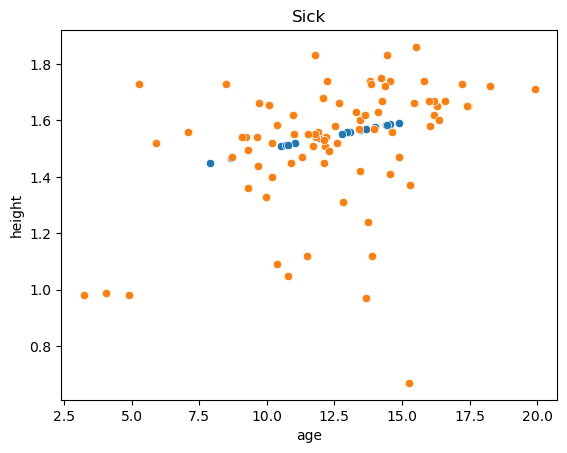

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\K

MAE: 0.06741008953747651
RMSE: 0.07225008485784129


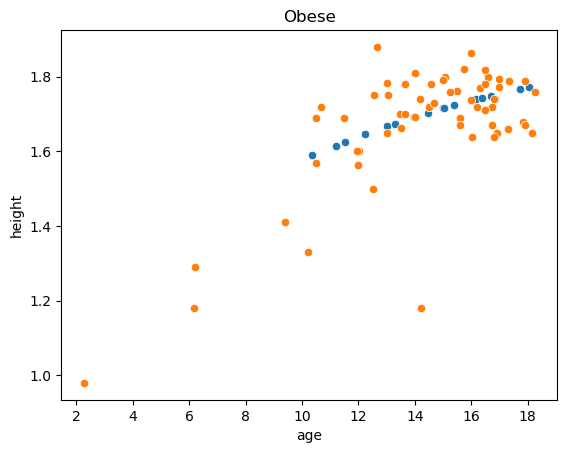

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\K

MAE: 0.07401255022167498
RMSE: 0.07593653592232637


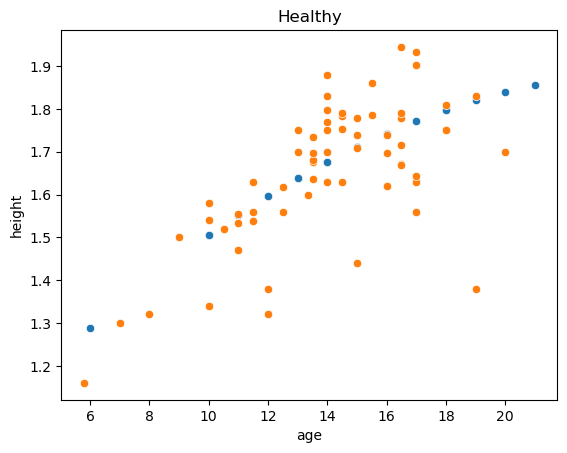

c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\K

In [17]:
loop = 0 
for set in [sick, obese, healthy]:
    predict_height(set, loop, True)
    loop +=1

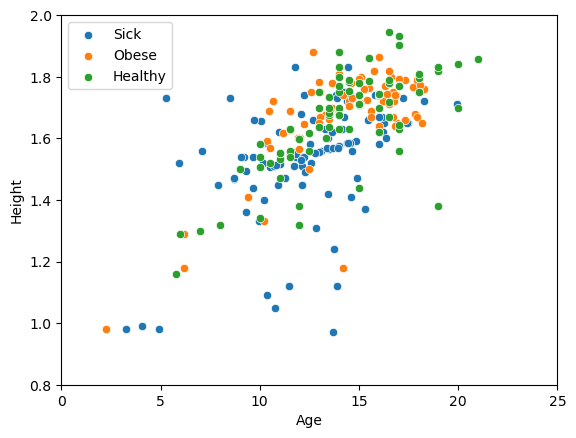

In [18]:

sns.scatterplot(data=sick, x = 'age', y='height', label= 'Sick')
sns.scatterplot(data=obese, x = 'age', y='height', label = 'Obese' )
sns.scatterplot(data=healthy, x = 'age', y='height', label = 'Healthy')
plt.xlabel('Age')
plt.ylabel('Height')
plt.ylim((0.8,2))
plt.xlim((0,25))
plt.legend(loc=2)

In [19]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,centyl,mean_for_age,SD_populacji,Z_score_BMI,50_centyl_BMI,wątroba powiększona,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,275.000000,275.000000,208.000000,127.000000,124.000000,123.000000,120.000000,100.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.448200,1.616496,25.198620,74.196850,19.299194,2.701382,0.855838,18.686000,0.040000,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,20.236100,0.184666,5.494137,33.330962,1.769823,0.465180,3.836220,1.721112,0.196316,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,3.000000,15.540000,1.280000,-10.881119,15.400000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,55.450000,1.550000,21.122453,50.000000,17.900000,2.520000,-0.433835,17.450000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,65.103509,1.660000,25.126759,97.000000,19.630000,2.710000,1.743748,19.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,80.000000,1.740000,28.648469,97.000000,20.790000,2.930000,2.603780,20.100000,0.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,97.000000,21.650000,3.300000,16.722513,21.500000,1.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


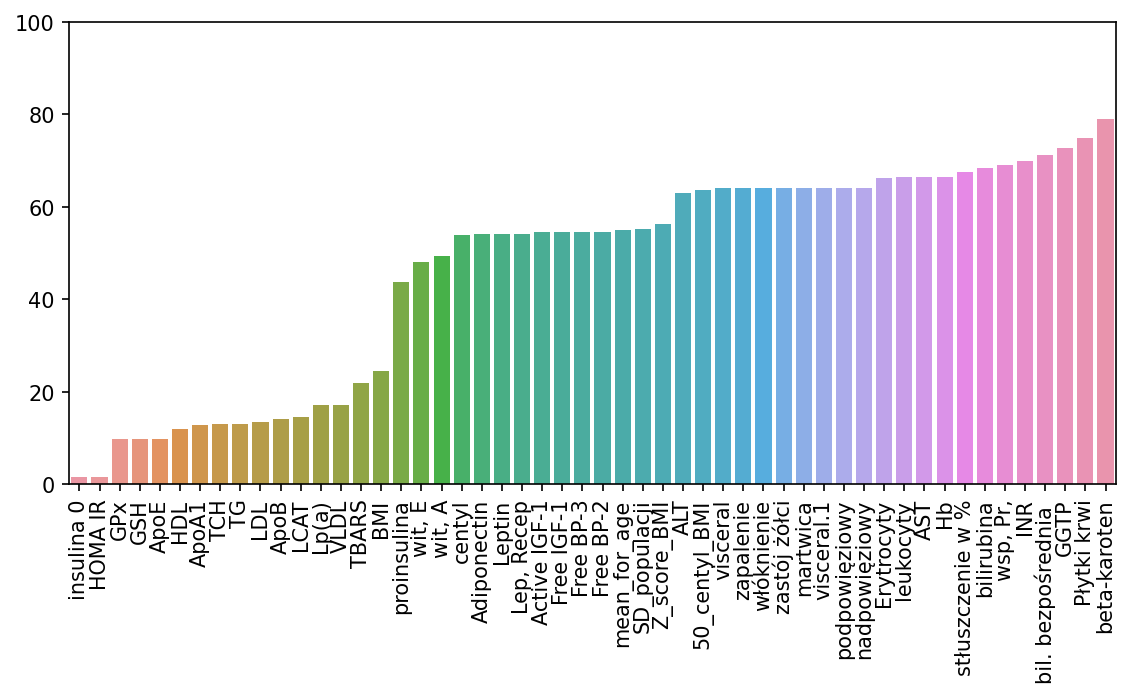

In [20]:
draw_missing(dataset)

In [21]:
for column in ['insulina 0','HOMA IR','mean_for_age', 'SD_populacji','Z_score_BMI', '50_centyl_BMI', 'GPx','GSH', 'ApoE', 'HDL','ApoA1','TCH','TG','LDL', 'ApoB', 'LCAT', 'VLDL', 'Lp(a)', 'TBARS']:
    dataset[column] = dataset.groupby('label')[column].transform(lambda val: val.fillna(val.mean()))

In [22]:
dataset.loc[dataset['BMI'].isnull(), ['BMI']] = dataset[dataset['BMI'].isnull()]['weight']/(dataset[dataset['BMI'].isnull()]['height']**2)


### Dealing with categorical columns

Change 'centyl' column


In [23]:
dataset[dataset['centyl'].notnull()]['centyl'] = dataset[dataset['centyl'].notnull()]['centyl'].apply(int)
for column in ['centyl']:
    dataset[column] = dataset.groupby('label')[column].transform(lambda val: val.fillna(val.mean()))

C:\Users\Kubi\AppData\Local\Temp\ipykernel_23880\3151428507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset['centyl'].notnull()]['centyl'] = dataset[dataset['centyl'].notnull()]['centyl'].apply(int)


Change sex column to numerical

In [24]:
dataset.loc[dataset['sex'] != 'D', ['sex']] = 'C'
dataset['sex'] = pd.get_dummies(dataset['sex'],drop_first=True)

Change 'bilirubina' column

In [25]:
dataset.loc[dataset['bilirubina'] == '<1,0', ['bilirubina']] = 0.5
dataset.loc[dataset['bilirubina'] == '< 1,0', ['bilirubina']] = 0.5
dataset.loc[dataset['bilirubina'].isnull(), ['bilirubina']] = 1
dataset['bilirubina'] = dataset['bilirubina'].apply(float)

dataset.loc[dataset['bil. bezpośrednia '] == '<1,0', ['bil. bezpośrednia ']] = 0.5
dataset.loc[dataset['bil. bezpośrednia '] == '< 1,0', ['bil. bezpośrednia ']] = 0.5
dataset.loc[dataset['bil. bezpośrednia '].isnull(), ['bil. bezpośrednia ']] = 1
dataset['bil. bezpośrednia '] = dataset['bil. bezpośrednia '].apply(float)

Change 'visceral' column

In [26]:
dataset['visceral'] = dataset.groupby('label')['visceral'].transform(lambda val: val.fillna(val.mean()))

### Continue to fill missing values

In [27]:
sum(dataset['50_centyl_BMI'].isnull())

98

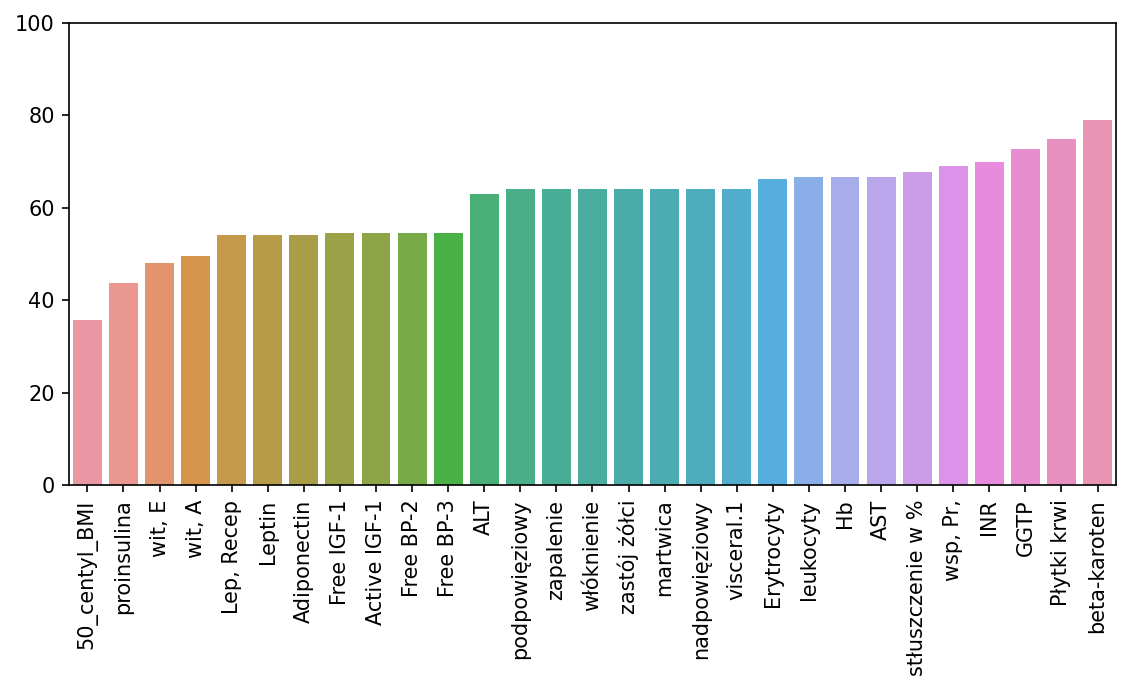

In [28]:
draw_missing(dataset)

In [29]:
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 274
Data columns (total 113 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    age                                        float64
 1    label                                      object 
 2    sex                                        bool   
 3    weight                                     float64
 4    height                                     float64
 5    BMI                                        float64
 6    centyl                                     float64
 7    mean_for_age                               float64
 8    SD_populacji                               float64
 9    Z_score_BMI                                float64
 10   50_centyl_BMI                              float64
 11   wątroba powiększona                        int64  
 12   niejednorodnie podwyższona echogeniczność  int64  
 13   zmiany ogniskowe                      